In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import pickle
from collections import OrderedDict

In [4]:
dset = 'eth'

In [5]:
#Trajectorn++
trajpp = np.load('./Visualization/raw/Trajectron++/' + dset + '_test_traj++.npz')
trajpp_other = np.load('./Visualization/raw/Trajectron++/' + dset + '_test_traj_gmm.npz')

trajpp_ = {}
trajpp_['obs'] = np.transpose(trajpp_other['obs'], axes=(0, 2, 1))
trajpp_['tarj'] = np.transpose(trajpp['gt_abs'], axes=(0, 2, 1))
trajpp_['tarj'] = trajpp_['tarj'] - trajpp_['obs'][..., 0:1]
trajpp_['tarj_ref'] = np.transpose(trajpp['gt_rel'], axes=(0, 2, 1))
trajpp_['pred'] = np.transpose(trajpp['pred_abs'], axes=(
    0, 1, 3, 2))[:, :100, ...] - trajpp_['obs'][:, None, :, 0:1]
trajpp_['obs'] = trajpp_['obs'] - trajpp_['obs'][..., 0:1]

len(trajpp_['obs'])

364

In [47]:
with open('./Visualization/raw/Social-STGCNN/save_' + dset + '.pkl', 'rb') as f:
    sstgcnn = pickle.load(f)

sstgcnn_ = {}
sstgcnn_['obs'] = np.concatenate(sstgcnn['obs'], axis=1).squeeze()
sstgcnn_['tarj'] = np.concatenate(sstgcnn['tarj'], axis=1).squeeze()
print(sstgcnn['tarj'][0].shape)
sstgcnn_['tarj'] = sstgcnn_['tarj'] - sstgcnn_['obs'][..., 0:1]
full_traj = np.concatenate((sstgcnn_['obs'], sstgcnn_['tarj']), axis=-1)
sstgcnn_['tarj_ref'] = (full_traj[..., 1:] - full_traj[..., :-1])[..., -12:]

print(sstgcnn_['obs'].shape)
print(sstgcnn_['tarj'].shape)
print(full_traj.shape)
print(sstgcnn_['tarj_ref'].shape)

PRED = []
for i in range(len(sstgcnn['pred'])):
    PRED.append(np.stack(sstgcnn['pred'][i]))
print(sstgcnn['pred'][0][0].shape)
print(np.stack(sstgcnn['pred'][0]).shape)
sstgcnn_['pred'] = np.transpose(
    np.concatenate(PRED, axis=2).squeeze(),
    axes=(2, 0, 3, 1)) - sstgcnn_['obs'][:, None, :, 0:1]
print(sstgcnn_['pred'].shape)
sstgcnn_['obs'] = sstgcnn_['obs'] - sstgcnn_['obs'][..., 0:1]
len(sstgcnn_['obs'])

(1, 2, 2, 12)
(181, 2, 8)
(181, 2, 12)
(181, 2, 20)
(181, 2, 12)
(12, 2, 2)
(100, 12, 2, 2)
(181, 100, 2, 12)


181

In [18]:
with open('./Visualization/raw/Social-STGCNN/save_' + dset + '.pkl', 'rb') as f:
    sstgcnn = pickle.load(f)

sstgcnn_ = {}
sstgcnn_['obs'] = np.concatenate(sstgcnn['obs'], axis=1).squeeze()
sstgcnn_['tarj'] = np.concatenate(sstgcnn['tarj'], axis=1).squeeze()
sstgcnn_['tarj'] = sstgcnn_['tarj'] - sstgcnn_['obs'][..., 0:1]
full_traj = np.concatenate((sstgcnn_['obs'], sstgcnn_['tarj']), axis=-1)
sstgcnn_['tarj_ref'] = (full_traj[..., 1:] - full_traj[..., :-1])[..., -12:]
PRED = []
for i in range(len(sstgcnn['pred'])):
    PRED.append(np.stack(sstgcnn['pred'][i]))
sstgcnn_['pred'] = np.transpose(
    np.concatenate(PRED, axis=2).squeeze(),
    axes=(2, 0, 3, 1)) - sstgcnn_['obs'][:, None, :, 0:1]
sstgcnn_['obs'] = sstgcnn_['obs'] - sstgcnn_['obs'][..., 0:1]
len(sstgcnn_['obs'])

181

In [19]:
with open('./Visualization/raw/Social-Implicit/save_' + dset + '.pkl', 'rb') as f:
    simplicit = pickle.load(f)

simplicit_ = {}
simplicit_['obs'] = np.concatenate(simplicit['obs'], axis=1).squeeze()
simplicit_['tarj'] = np.concatenate(simplicit['tarj'], axis=1).squeeze()
simplicit_['tarj'] = simplicit_['tarj'] - simplicit_['obs'][..., 0:1]
full_traj = np.concatenate((simplicit_['obs'], simplicit_['tarj']), axis=-1)
simplicit_['tarj_ref'] = (full_traj[..., 1:] - full_traj[..., :-1])[..., -12:]
PRED = []
for i in range(len(simplicit['pred'])):
    PRED.append(np.stack(simplicit['pred'][i]))
simplicit_['pred'] = np.transpose(
    np.concatenate(PRED, axis=2).squeeze(),
    axes=(2, 0, 3, 1)) - simplicit_['obs'][:, None, :, 0:1]
simplicit_['obs'] = simplicit_['obs'] - simplicit_['obs'][..., 0:1]

len(simplicit_['obs'])

181

In [20]:
with open('./Visualization/raw/ExpertTraj/save_' + dset + '.pkl', 'rb') as f:
    expertraj = pickle.load(f)

expertraj_ = {}
expertraj_['obs'] = np.transpose(np.concatenate(expertraj['obs'],
                                                axis=1).squeeze(),
                                 axes=(1, 2, 0))
expertraj_['tarj'] = np.transpose(np.concatenate(expertraj['tarj'],
                                                 axis=1).squeeze(),
                                  axes=(1, 2, 0))
full_traj = np.concatenate((expertraj_['obs'], expertraj_['tarj']), axis=-1)
expertraj_['tarj_ref'] = (full_traj[..., 1:] - full_traj[..., :-1])[..., -12:]
PRED = []
for i in range(len(expertraj['pred'])):
    PRED.append(np.stack(expertraj['pred'][i]))
expertraj_['pred'] = np.transpose(np.concatenate(PRED, axis=2).squeeze(),
                                  axes=(2, 0, 3, 1))

len(expertraj_['obs'])

364

In [21]:
with open('./Visualization/raw/Social-GAN/save_'+dset+'.pkl','rb') as f:
    sgan = pickle.load(f)

sgan_ = {}
sgan_['obs'] = np.transpose(np.concatenate(sgan['obs'],axis = 1).squeeze(), axes=(1,2,0))
sgan_['tarj'] = np.transpose(np.concatenate(sgan['tarj'],axis = 1).squeeze(), axes=(1,2,0))
sgan_['tarj'] = sgan_['tarj']-sgan_['obs'][...,0:1]
full_traj =np.concatenate((sgan_['obs'], sgan_['tarj']),axis=-1)
sgan_['tarj_ref'] = (full_traj[...,1:]- full_traj[...,:-1])[...,-12:]
PRED = []
for i in range(len(sgan['pred'])):
    PRED.append(np.stack(sgan['pred'][i]))
sgan_['pred'] = np.transpose(np.concatenate(PRED,axis = 2).squeeze(), axes=(2,0,3,1))- sgan_['obs'][:, None, :, 0:1]
sgan_['obs'] = sgan_['obs']- sgan_['obs'][...,0:1]

len(sgan_['tarj'])

181

In [7]:
def get_closer_index(key,query):
    diff = np.linalg.norm(query - key, axis=-2).sum(-1)
    argmin = np.argmin(diff,axis=0)
    # print(diff[argmin], argmin, "\n",key,"\n",query[argmin])
    return argmin

In [23]:
collect = []

for key in  range(len(sstgcnn_['obs'])):
    collect.append(OrderedDict())
    key_value = sstgcnn_['obs'][key]

    key_trajpp = get_closer_index(key_value, trajpp_['obs'])
    key_sgan = get_closer_index(key_value, sgan_['obs'])
    key_simplicit = get_closer_index(key_value, simplicit_['obs'])
    key_expertraj = get_closer_index(key_value, expertraj_['obs'])

    collect[-1]['Observation'] = sstgcnn_['obs'][key]
    collect[-1]['GroundTruth'] = sstgcnn_['tarj'][key]
    collect[-1]['S-GAN'] = sgan_['pred'][key_sgan]
    collect[-1]['S-STGCNN'] = sstgcnn_['pred'][key]
    collect[-1]['S-Implicit'] = simplicit_['pred'][key_simplicit]
    collect[-1]['Trajectron++'] = trajpp_['pred'][key_trajpp]
    collect[-1]['ExpertTraj'] = expertraj_['pred'][key_expertraj]

In [10]:
# print stats 
len(collect)

181

In [12]:
import os
if not os.path.exists('./aligned'):
    os.makedirs('./aligned')

In [24]:
with open('./aligned/vis_'+dset+'.pkl','wb') as f : 
    pickle.dump(collect,f)

In [25]:
# collect[-1]['Observation'] = sstgcnn_['obs'][key]
# collect[-1]['GroundTruth'] = sstgcnn_['tarj'][key]
# collect[-1]['S-GAN'] = sgan_['pred'][key]
# collect[-1]['S-STGCNN'] = sstgcnn_['pred'][key]
# collect[-1]['S-Implicit'] = simplicit_['pred'][key]
# collect[-1]['Trajectron++'] = trajpp_['pred'][key]
# collect[-1]['ExpertTraj'] = expertraj_['pred'][key]
dset = 'eth' # change dest to 'eth', 'zara1', 'hotel' 
with open('./aligned/vis_'+dset+'.pkl', 'rb') as f:
    data = pickle.load(f)
output_dir= './' + dset + 'Vis'
if not os.path.exists(output_dir):
  # Create a new directory because it does not exist 
  os.makedirs(output_dir)

In [51]:
print(len(data))
print(data[0].keys())

181
odict_keys(['Observation', 'GroundTruth', 'S-GAN', 'S-STGCNN', 'S-Implicit', 'Trajectron++', 'ExpertTraj'])


In [26]:
def obtain_limits(model_data, normal_xy_ratio=True):
    x_min = y_min = np.inf
    x_max = y_max = -np.inf
    for trajs in model_data.values():
        sub_x_min = trajs[..., 0, :].min()
        sub_x_max = trajs[..., 0, :].max()
        sub_y_min = trajs[..., 1, :].min()
        sub_y_max = trajs[..., 1, :].max()
        x_min = min(x_min, sub_x_min)
        x_max = max(x_max, sub_x_max)
        y_min = min(y_min, sub_y_min)
        y_max = max(y_max, sub_y_max)
    x_len = x_max - x_min
    y_len = y_max - y_min
    
    if normal_xy_ratio:
        if x_len/y_len > 3.5/4.5:  # the x/y ratio of plot region in the figure is about 3.5/4.5. 
            # y_len is too small
            y_center = (y_max + y_min) / 2
            y_len = x_len / 3.5 * 4.5
            y_min = y_center - y_len / 2
            y_max = y_center + y_len / 2
        else:
            # x_len is too small
            x_center = (x_max + x_min) / 2
            x_len = y_len / 4.5 * 3.5
            x_min = x_center - x_len / 2
            x_max = x_center + x_len / 2
        
    return [x_min, x_max], [y_min, y_max]

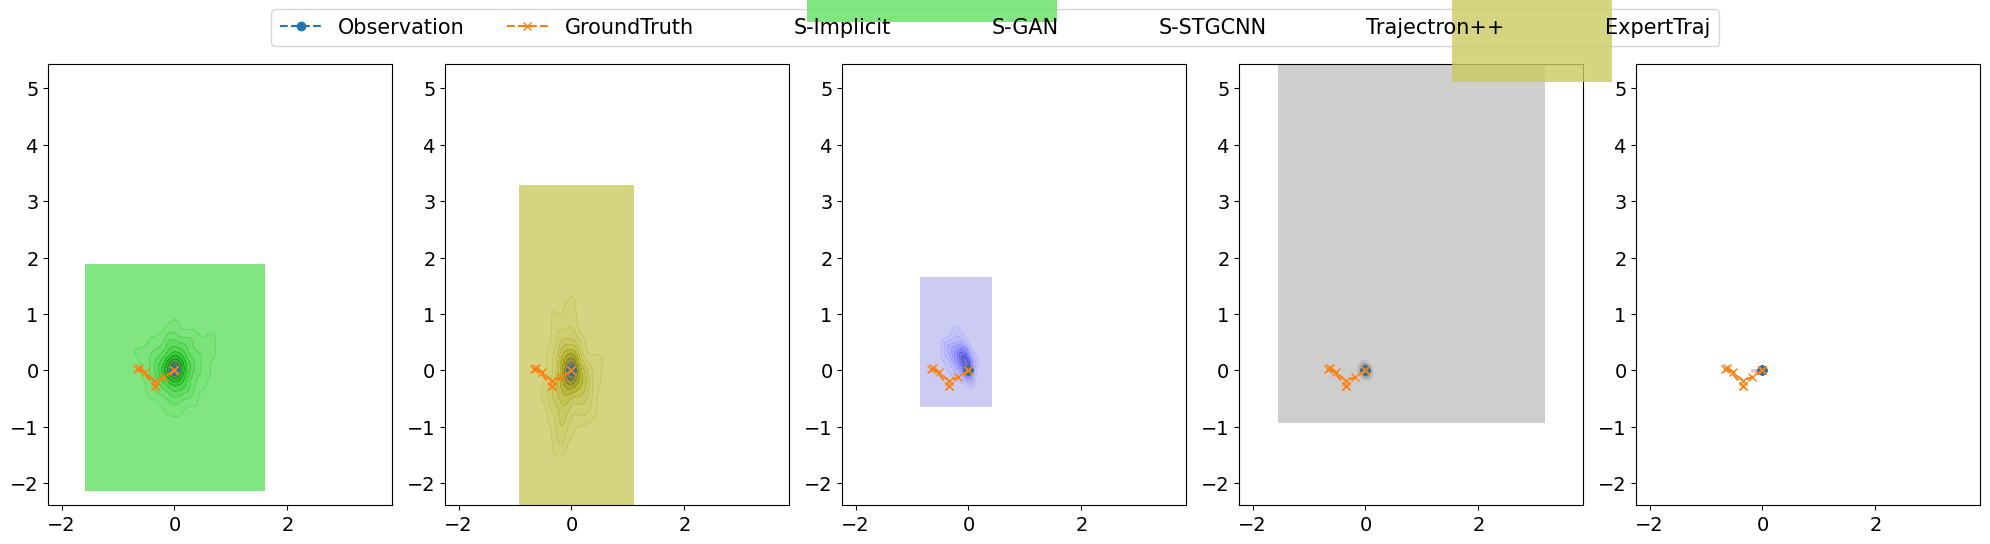

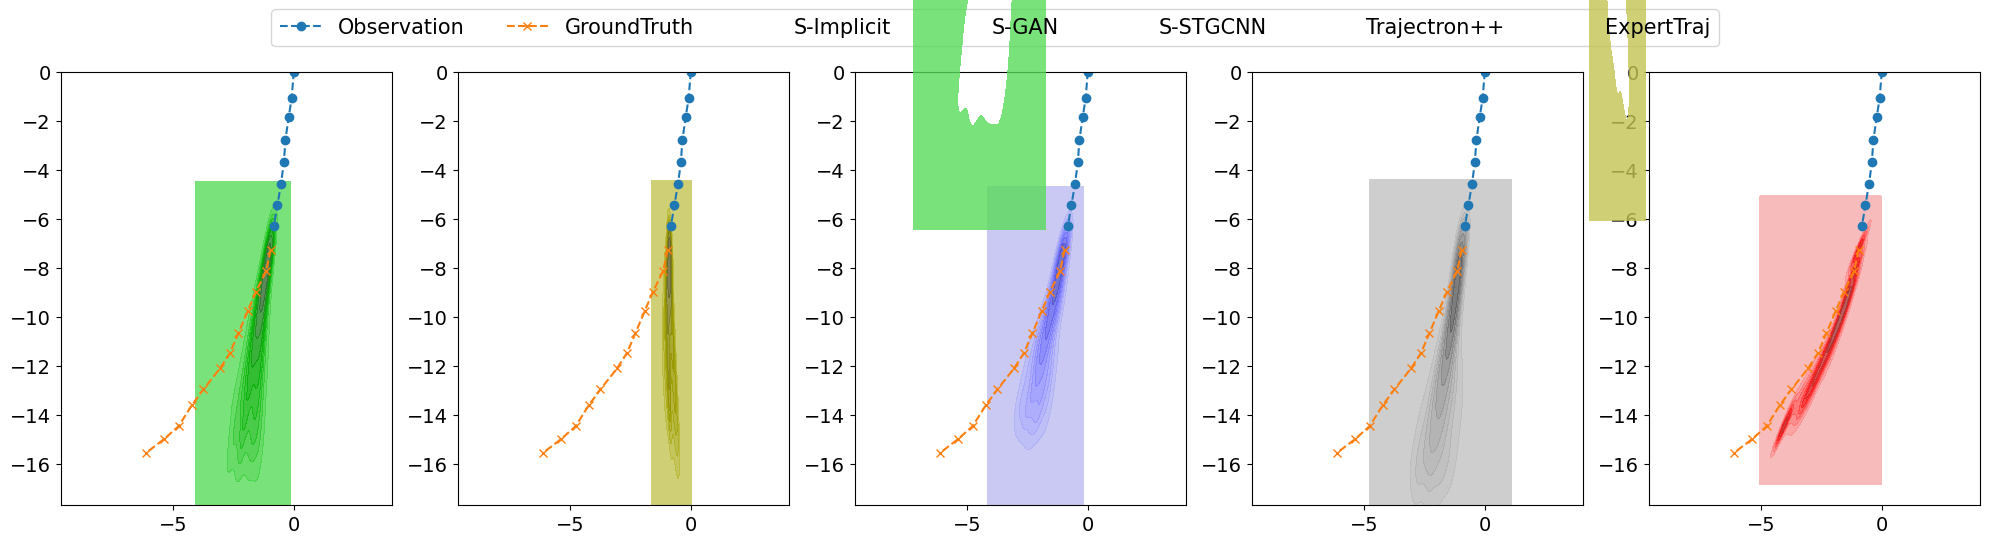

In [52]:
cmap = ['g', 'y', 'b', 'k', 'r']

indices = {}
#Paper indices
indices['eth'] = [10,65]
indices['hotel'] = [419,701]
indices['zara1'] = [2031,315,1290]
# indices['eth'] = [
#     0, 14, 21, 24, 33, 44, 45, 50, 58, 60, 79, 92, 93, 95, 105, 106, 112, 113,
#     121, 113, 121, 122, 127, 140, 153, 159, 164, 166, 167, 170, 172, 177
# ]
# indices['hotel'] = [
#     30, 87, 173, 189, 196, 198, 221, 329, 364, 419, 501, 510, 528, 560, 572,
#     620, 701, 719, 733, 818, 850, 861, 870, 965, 1007, 1008, 1013, 1031, 1046,
#     1052
# ]
# indices['zara1'] = [
#     25, 38, 130, 240, 315, 347, 461, 648, 679, 687, 693, 720, 781, 858, 947,
#     1004, 1053, 1091, 1130, 1178, 1290, 1320, 1359, 1691, 1702, 1884, 1927,
#     2031, 2186, 2220
# ]

for key in indices[dset]:
    fig, ax = plt.subplots(1, 5, figsize=(20, 5))  #,sharex=True, sharey=True)

    # Deyao: i notice that for the selected examples, eth and zara1 are better visualized when we switch x and y axis
    if dset in ['eth', 'zara1']:
        for model in data[key].keys():
            data[key][model] = np.flip(data[key][model], axis=-2)

    for i in range(5):
        if i == 0:
            ax[i].plot(data[key]['Observation'][0],
                       data[key]['Observation'][1],
                       '--o',
                       label='Observation')
            ax[i].plot(data[key]['GroundTruth'][0],
                       data[key]['GroundTruth'][1],
                       '--x',
                       label='GroundTruth')
        else:
            ax[i].plot(data[key]['Observation'][0],
                       data[key]['Observation'][1], '--o')
            ax[i].plot(data[key]['GroundTruth'][0],
                       data[key]['GroundTruth'][1], '--x')

    x_limit, y_limit = obtain_limits(data[key])

    sns.kdeplot(x=data[key]['S-Implicit'][:, 0].reshape(-1),
                y=data[key]['S-Implicit'][:, 1].reshape(-1),
                fill=True,
                thresh=False,
                color=cmap[0],
                alpha=0.8,
                label='S-Implicit',
                ax=ax[0])

    sns.kdeplot(x=data[key]['S-GAN'][:, 0].reshape(-1),
                y=data[key]['S-GAN'][:, 1].reshape(-1),
                fill=True,
                thresh=False,
                color=cmap[1],
                alpha=0.8,
                label='S-GAN',
                ax=ax[1])
    sns.kdeplot(x=data[key]['S-STGCNN'][:, 0].reshape(-1),
                y=data[key]['S-STGCNN'][:, 1].reshape(-1),
                fill=True,
                thresh=False,
                color=cmap[2],
                alpha=0.8,
                label='S-STGCNN',
                ax=ax[2])
    sns.kdeplot(x=data[key]['Trajectron++'][:, 0].reshape(-1),
                y=data[key]['Trajectron++'][:, 1].reshape(-1),
                fill=True,
                thresh=False,
                color=cmap[3],
                alpha=0.8,
                label='Trajectron++',
                ax=ax[3])
    sns.kdeplot(x=data[key]['ExpertTraj'][:, 0].reshape(-1),
                y=data[key]['ExpertTraj'][:, 1].reshape(-1),
                fill=True,
                thresh=False,
                color=cmap[4],
                alpha=0.8,
                label='ExpertTraj',
                ax=ax[4])

    for i in range(5):
        ax[i].xaxis.set_tick_params(labelsize=14)
        ax[i].yaxis.set_tick_params(labelsize=14)
        ax[i].set_xlim(x_limit)  # deyao: Here the limit changed
        ax[i].set_ylim(y_limit)

    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines,
               labels,
               loc="upper center",
               ncol=7,
               fontsize=15,
               bbox_to_anchor=(0.5, 1.1))
    plt.tight_layout()
    plt.savefig(output_dir+ '/case_' + dset + '_' + str(key) + '.png',
            dpi=300,
            bbox_inches='tight')
    plt.show()